# Goal - Can you predict if a candy is chocolate or not based on other variables? 

We want to use various classification models to predict if the candy is chocolate based or not using other multiple categorical predictors.
1. Logistic Regression
2. K-Nearest-Neighbor 
3. Decision Tree 


If the candy has chocolate, the candy 'chocolate' value equals 1. Otherwise, it equals 0.

# Dataset: 

This is a dataset of 85 different Halloween Candies and information about them obtained from kaggle (https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking).

The data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [2]:
df_candy = pd.read_csv('candy-data.csv')
df_candy = df_candy[['competitorname', 'chocolate', 'fruity', 'caramel','peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar','pluribus', 'sugarpercent']]
df_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604
2,One dime,0,0,0,0,0,0,0,0,0,0.011
3,One quarter,0,0,0,0,0,0,0,0,0,0.011
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906
...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220
81,Warheads,0,1,0,0,0,0,1,0,0,0.093
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186


Data collected from asking what is the most popular best Halloween candy?

**Chocolate:** Does it contain chocolate? (1 = Yes, 0 = No)

**fruity:** Is it fruit flavored?(1 = Yes, 0 = No)

**caramel:** Is there caramel in the candy? (1 = Yes, 0 = No)

**eanutalmondy:** Does it contain peanuts, peanut butter or almonds? (1 = Yes, 0 = No)

**nougat:** Does it contain nougat? (1 = Yes, 0 = No)

**crispedricewafer:** Does it contain crisped rice, wafers, or a cookie component? (1 = Yes, 0 = No)

**hard:** Is it a hard candy? (1 = Yes, 0 = No)

**bar:** Is it a candy bar? (1 = Yes, 0 = No)

**pluribus:** Is it one of many candies in a bag or box? (1 = Yes, 0 = No)

**sugarpercent** Is the % amount of sugar in that particular candy

# Data Cleaning

### Check if there are null or missing values in the data set

In [3]:
#missing data
df_candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
dtype: int64

### Check the number chocolate candies in the dataset and see if there is a fair distribution

In [4]:
result = pd.DataFrame(df_candy['chocolate'].value_counts())
result

,count
chocolate,
0,48
1,37


<Axes: xlabel='chocolate'>

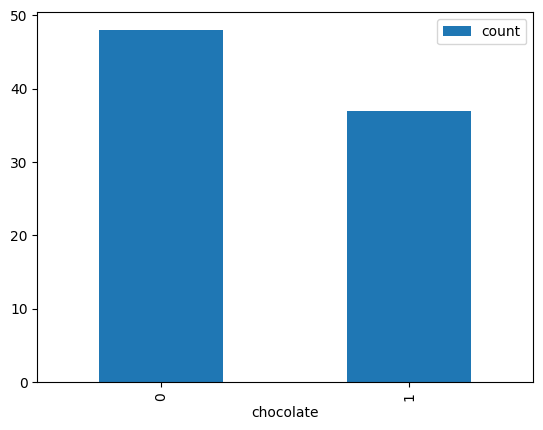

In [5]:
result.plot.bar()

### Check the correlation of each predictor variable with the response variable (Chocolate)
- A value greater than 0 means positive correlation
- A value less than 0 means negative correlation

In [6]:
# Predictor variables 
X = df_candy[['fruity', 'caramel','peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar','pluribus', 'sugarpercent']]

# Response variable 
y =  df_candy['chocolate']

correlation_matrix = X.corrwith(y)
display(correlation_matrix)

fruity             -0.741721
caramel             0.249875
peanutyalmondy      0.377824
nougat              0.254892
crispedricewafer    0.341210
hard               -0.344177
bar                 0.597421
pluribus           -0.339675
sugarpercent        0.104169
dtype: float64

# Expectation - No, I am expecting that we will not be able to predict if a candy is chocolate based or not based on other variables. 

Firstly, by nature of the topic there exists only a certain number of unique candies that exist so the size of the sample is limited. As a result, any conclusion we draw from the dataset may be biased. 

Next, each candy company may approach making their candies in a multitude of ways where any correlation might just be coincidence. As a result, it may be very difficult to accurately predict if a candy is chocolate based on other variables and conclude a trend. 

# Different types of Models that will be used in this project
* Logistic Regression
* K Nearest Neighbors
* Decision Tree 

# Find which models work the best

#### Evaluation - The correctness of the model will be based on cacluating the Accuracy, Precision, Recall and F1 score of the model implementation.

### *Logistic Regression*

In [10]:
# split the dataset into training and test dataset. 
# the training dataset is used to train the model and test dataset is used to test the model's performance on new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Standardize to variables 
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# perform logistic regression by creating LR object and fit
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)


# make prediction using the model (test dataset)
lr_y_pred = logisticModel.predict(X_test)

# the accuracy score represent the proportion of correct predictions made by the model
print("Accuracy score is ",accuracy_score(y_test,lr_y_pred))

# classification report
# The precision is ratio of the True Positives over all the Positives
# The recall is the measure of our model correctly identifying True Positives

print(classification_report(y_test, lr_y_pred))

# the confusion matrix helps to see how the model performed. 
pd.crosstab(y_test, lr_y_pred)


Accuracy score is  0.8636363636363636
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.80      0.89      0.84         9

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



col_0,0,1
chocolate,,
0,11,2
1,1,8


##### - *Precision* 

* Of all candies predicted to not have chocolate, 92% actually did not have chocolate according to the model. 

* Of all candies predicted to have chocolate, 80% actually did have chocolate according to the model. 

##### - *recall*
* The model correctly identified 85% of candies that did not have chocolate. 

* The model correctly identified 89% of candies that did have chocolate in them. 

##### - *f1-score*

* The value of .88 is pretty close to 1 which indicades a good balance between precision and recall, so it tells us that the model does a good job in predicting whether or not a candy will not have chocolate.

* The value of .44 is pretty close to 1 which indicades a good balance between precision and recall, so it tells us that the model does a good job in predicting whether or not a candy will have chocolate .

### *K Nearest Neighbors*

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# use jaccard distance, metrics intended for boolean-valued vectors spaces. I.E. If a candy is hard candy but the other isn't 
# then they are dissimilar.
knn = KNeighborsClassifier(n_neighbors=10, metric='jaccard')
knn.fit(X_train_scaled, y_train)

knn_y_pred = knn.predict(X_test_scaled)

# the accuracy score represent the proportion of correct predictions made by the model
print("Accuracy score is ",accuracy_score(y_test,knn_y_pred))

# classification report
print(classification_report(y_test, knn_y_pred))

# the confusion matrix helps to see how the model performed. 
pd.crosstab(y_test, knn_y_pred)

Accuracy score is  0.5909090909090909
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        13
           1       0.00      0.00      0.00         9

    accuracy                           0.59        22
   macro avg       0.30      0.50      0.37        22
weighted avg       0.35      0.59      0.44        22



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

col_0,0
chocolate,
0,13
1,9


##### - *Precision* 

* Of all candies predicted to not have chocolate, 59% actually did not have chocolate according to the model. 

* Of all candies predicted to have chocolate, 0% actually did have chocolate according to the model. 

##### - *recall*
* The model correctly identified 100% of candies that did not have chocolate. 

* The model correctly identified 0% of candies that did have chocolate in them. 

##### - *f1-score*

* The value of .74 is pretty close to 1 which indicates a good balance between precision and recall, so it tells us that the model does a good job in predicting whether or not a candy will not have chocolate.

* The value of 0 is very bad so it tells us that the model could not predict whether or not a candy will have chocolate.

### *Decision Tree*

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred_dt))
print("Accuracy Score is :",metrics.accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.69      1.00      0.82         9

    accuracy                           0.82        22
   macro avg       0.85      0.85      0.82        22
weighted avg       0.87      0.82      0.82        22

Accuracy Score is : 0.8181818181818182


##### - *Precision* 

* Of all candies predicted to not have chocolate, 100% actually did not have chocolate according to the model. This data seems suspicious since any data with 100% seems unlikely. 

* Of all candies predicted to have chocolate, 69% actually did have chocolate according to the model. 

##### - *recall*
* The model correctly identified 60% of candies that did not have chocolate. 

* The model correctly identified 100% of candies that did have chocolate in them. This data seems suspicious since any data with 100% seems unlikely. 

##### - *f1-score*

* The value of .82 is pretty close to 1 which indicades a good balance between precision and recall, so it tells us that the model does a good job in predicting whether or not a candy will not have chocolate.

* The value of .82 is also pretty close to 1 which indicades a good balance between precision and recall, so it tells us that the model does a good job in predicting whether or not a candy will have chocolate.

# Conclusion: It seems that Logistic Regression is the best model for this dataset.

# Improving Metrics: feature selection, data manipulation, parameter tuning

- X1 will be set of predictors that only includes ingredients that goes inside the candy. 
- X2 will be set of predictors excluding ingredients. 
- X3 will be set of predictors that have a positive correlation with the response (Chocolate) as shown in the beginning of the section.

In [18]:
X1 = df_candy[['fruity', 'caramel', 'nougat', 'crispedricewafer', 'peanutyalmondy']]
X2 = df_candy[['hard', 'bar','pluribus', 'sugarpercent']]
X3 = df_candy[['caramel','peanutyalmondy', 'nougat', 'crispedricewafer', 'bar', 'sugarpercent']]
y =  df_candy['chocolate']

# 80% model train and 20% model test 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=123)

In [20]:
# Standardize to variables 
scale = StandardScaler()
X1_train=scale.fit_transform(X1_train)
X1_test=scale.transform(X1_test)

# perform logistic regression by creating LR object and fit
logisticModel = LogisticRegression()
logisticModel.fit(X1_train, y1_train)


# make prediction using the model (test dataset)
lr_y_pred = logisticModel.predict(X1_test)

# the accuracy score represent the proportion of correct predictions made by the model
print("Accuracy score is ",accuracy_score(y1_test,lr_y_pred))

# classification report
# The precision is ratio of the True Positives over all the Positives
# The recall is the measure of our model correctly identifying True Positives

print(classification_report(y1_test, lr_y_pred))

# the confusion matrix helps to see how the model performed. 
pd.crosstab(y1_test, lr_y_pred)

Accuracy score is  0.8636363636363636
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.75      1.00      0.86         9

    accuracy                           0.86        22
   macro avg       0.88      0.88      0.86        22
weighted avg       0.90      0.86      0.86        22



col_0,0,1
chocolate,,
0,10,3
1,0,9


In [21]:
# Standardize to variables 
scale = StandardScaler()
X2_train=scale.fit_transform(X2_train)
X2_test=scale.transform(X2_test)

# perform logistic regression by creating LR object and fit
logisticModel = LogisticRegression()
logisticModel.fit(X2_train, y2_train)


# make prediction using the model (test dataset)
lr_y_pred2 = logisticModel.predict(X2_test)

# the accuracy score represent the proportion of correct predictions made by the model
print("Accuracy score is ",accuracy_score(y2_test,lr_y_pred2))

# classification report
# The precision is ratio of the True Positives over all the Positives
# The recall is the measure of our model correctly identifying True Positives

print(classification_report(y2_test, lr_y_pred2))

# the confusion matrix helps to see how the model performed. 
pd.crosstab(y2_test, lr_y_pred2)

Accuracy score is  0.6363636363636364
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.55      0.67      0.60         9

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.63        22
weighted avg       0.65      0.64      0.64        22



col_0,0,1
chocolate,,
0,8,5
1,3,6


In [22]:
# Standardize to variables 
scale = StandardScaler()
X3_train=scale.fit_transform(X3_train)
X3_test=scale.transform(X3_test)

# perform logistic regression by creating LR object and fit
logisticModel = LogisticRegression()
logisticModel.fit(X3_train, y3_train)


# make prediction using the model (test dataset)
lr_y_pred3 = logisticModel.predict(X3_test)

# the accuracy score represent the proportion of correct predictions made by the model
print("Accuracy score is ",accuracy_score(y3_test,lr_y_pred3))

# classification report
# The precision is ratio of the True Positives over all the Positives
# The recall is the measure of our model correctly identifying True Positives

print(classification_report(y3_test, lr_y_pred3))

# the confusion matrix helps to see how the model performed. 
pd.crosstab(y3_test, lr_y_pred3)

Accuracy score is  0.8636363636363636
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.67      0.80         9

    accuracy                           0.86        22
   macro avg       0.91      0.83      0.85        22
weighted avg       0.89      0.86      0.86        22



col_0,0,1
chocolate,,
0,13,0
1,3,6


### Result: using various sets of predictors we observed certain trade offs depending on the one we used. 

- First, using the set of non ingredient variables as predictors gave the worst result (X2). While (X1) and (X3) gave familiar accuracy scores. 

- But the big difference was that by using the (X3) set of predictors with positive correlation to the response variable (Chocolate), it shows us that the model did the best job in predicting if a candy would not have chocolate in them or not. 

- If you used (X1) the set of predictors with ingredients only characteristics of a candy, then the model did a worse job at predicting if a candy would not have chocolate in them or not, but the model did bettere in predicting if a candy will have chocolate. 

### References: 
* https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking